# Assignment - 2

#### Krithika Devi Chandran
#### 2211570
#### Cohort: Data, AI & ML

## Agenda

* Problem Statement

    * Description & Task
    * Data Description
    
* Import Libraries
* Data Visualisation and augmentation 
    * Dealing with Imbalanced Data
    * Resampling Techniques - Oversample Minority Class
    * Scaling the data
    * K-Fold Cross Validation to split Train-Test data
* Decision Tree Classifier Model Building 
* XGBoost Classifier Model Building 
* Model Evaluation
* Model Comparison on performance

### Problem Statement

* Description & Task

Prepare a Python notebook to build, train and evaluate models on the given datasets. Please read the instructions carefully.x

**Business Case:** Build a classifier model to predict the credit card defaulter for given dataset

**Task:** Credit Card Defaulter Dataset

Credit Card Defaulter Dataset has five features


* **Unnamed: 0** id number of the credit card defaulter,
        
        {1,2,..10000}
* **default:** defaulter status of the credit card holder, 

        {No, Yes}
* **Student:** Student holder of the credit card 
        
        {No, Yes}
* **balance:** balance amount of the credit card holder, 
        
        
* **income:** income of the credit card holder 


### **1.	Import Libraries/Dataset (1 mark)**

* Import the required libraries and the dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv("credit_card_defaulter.csv") #let's load a dataset
df

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.37891
9996,9997,No,No,757.962918,19660.72177
9997,9998,No,No,845.411989,58636.15698
9998,9999,No,No,1569.009053,36669.11236


In [4]:
df.shape

(10000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [6]:
#import pandas_profiling as pp
#profile = pp.ProfileReport(df)
#profile

In [7]:
df.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462905
50%,5000.50000,823.636973,34552.644800
75%,7500.25000,1166.308387,43807.729275
max,10000.00000,2654.322576,73554.233500


In [8]:
df.describe(include=[object])

,default,student
count,10000,10000
unique,2,2
top,No,No
freq,9667,7056


In [9]:
# since unnamed: 0 column is not necessary for evaluation, dropping it

df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [10]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


### **2.	Data Visualisation and augmentation (0.5*6 =3 marks)**

* Plot at least two EDA graphs (use matplotlib/seaborn/any other library)

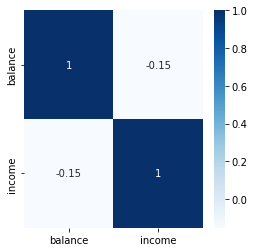

In [11]:
fig=plt.figure(figsize=(4,4))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()
fig.savefig('credit_default_heatmap.png')

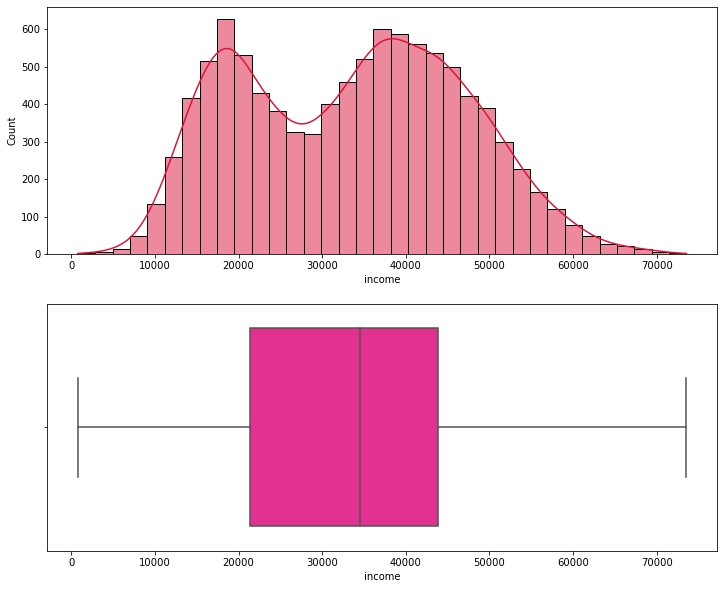

In [12]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,10))
sns.histplot(data = df, x='income',kde=True,color='crimson',ax=ax[0])
sns.boxplot(data = df,x='income',color='deeppink',ax=ax[1])
plt.show()

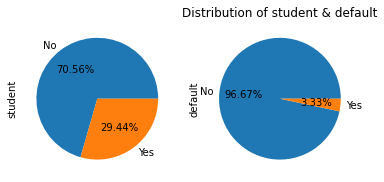

In [13]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(25,25))
df['student'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f%%',ax=ax[0])
df['default'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f%%',ax=ax[1])
plt.title("Distribution of student & default")
plt.show()

<AxesSubplot:xlabel='student'>

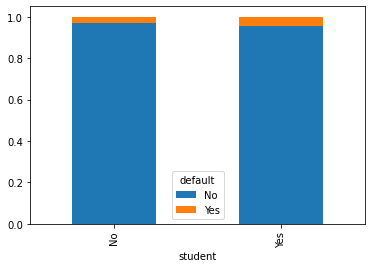

In [14]:
pd.crosstab(df['student'], df['default'], normalize='index').plot.bar(stacked=True)

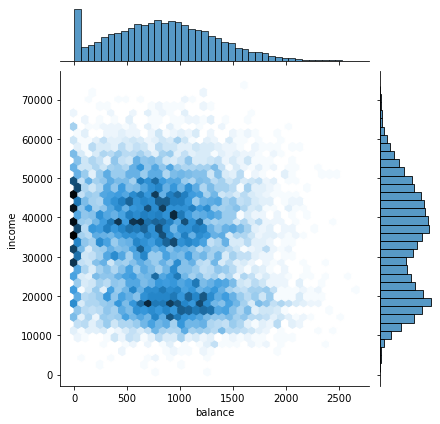

In [15]:
sns.jointplot(x='balance',y='income',data=df,kind = 'hex')
plt.show()

Text(0.5, 1.0, 'Distribution of student income')

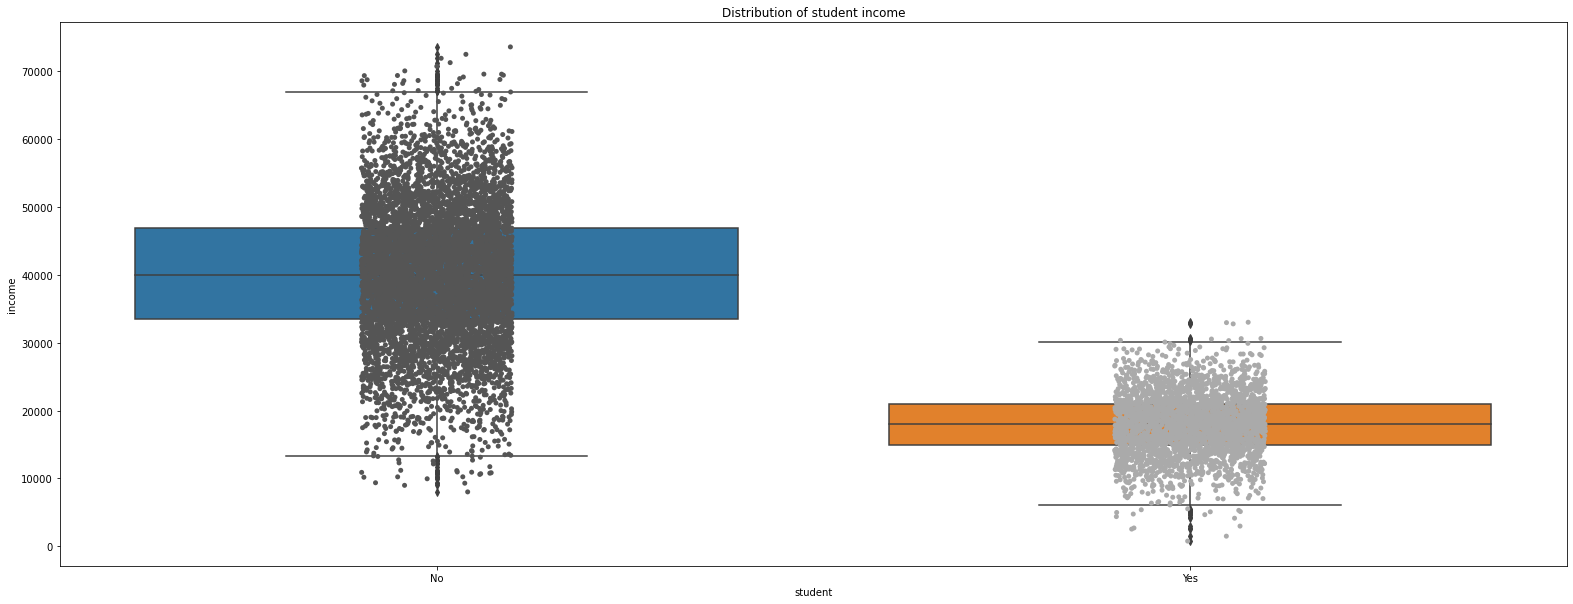

In [16]:
plt.figure(figsize =(27, 10))
sns.boxplot(y ='income', x ='student', data = df)
sns.stripplot(y ='income', x ='student', data = df, palette='gray')
plt.title("Distribution of student income")

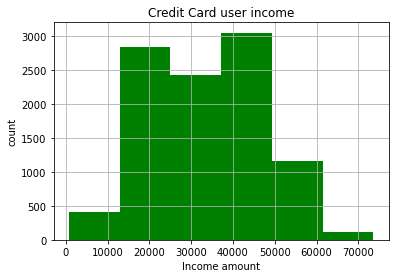

In [17]:
df['income'].hist(bins=6,color='green');
plt.title("Credit Card user income")
plt.xlabel('Income amount')
plt.ylabel('count');

In [22]:
fig = px.violin(df, x='student',y='balance',box=True,template='plotly_dark')
fig.show()

•	Perform missing values check 

In [19]:
df.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

There is no missing values in a data. Thus, performing this model for evaluation.

* Prepare data to be able to build a classification model 

In [20]:
#replacing categorical value of dependent feature - 'default' to numerical

renamed_col = {'default': {'No':0,'Yes':1}}
df.replace(renamed_col, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


In [23]:
# getting categorical columns after converting dependent column into integer type

cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['student'], dtype='object')

In [24]:
# Transforming the non-numerical data into numerical
encoded_df = pd.get_dummies(df, columns = cat_cols)
encoded_df.head()

,default,balance,income,student_No,student_Yes
0,0,729.526495,44361.62507,1,0
1,0,817.180407,12106.13470,0,1
2,0,1073.549164,31767.13895,1,0
3,0,529.250605,35704.49394,1,0
4,0,785.655883,38463.49588,1,0


In [25]:
encoded_df['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

## Dealing with Imbalanced Data

### **Resampling Techniques - Oversample Minority Class:** 

Oversampling can be defined as adding more copies of the minority class. In other words, we are creating artificial/synthetic data of the minority class (or group). Oversampling could be a good choice when you don’t have a lot of data to work with.

We will use the resampling module from Scikit-Learn library to randomly create artificial samples of data from the minority class.

In [26]:
# 'resample' is located under sklearn.utils
from sklearn.utils import resample

In [27]:
# separate minority and majority class
no_default = encoded_df[encoded_df.default == 0]
yes_default = encoded_df[encoded_df.default == 1]

In [28]:
# Unsample minority; we are oversampling the minority class to match the number of majority class
yes_default_upsampled = resample(yes_default,
                                replace = True, # sample with replacement
                                n_samples = len(no_default), # match number in majority class
                                random_state = 22)

In [29]:
# combine majority and upsampled minority
upsampled = pd.concat([no_default, yes_default_upsampled])

In [30]:
# Now checking the classes count
upsampled['default'].value_counts()

0    9667
1    9667
Name: default, dtype: int64

In [31]:
upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19334 entries, 0 to 9045
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   default      19334 non-null  int64  
 1   balance      19334 non-null  float64
 2   income       19334 non-null  float64
 3   student_No   19334 non-null  uint8  
 4   student_Yes  19334 non-null  uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 641.9 KB


### Scaling the data

* Perform scaling of data

In [32]:
# taking all non-encoded independent features 

non_encoded_X = upsampled[['balance','income']]


In [33]:
# scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
continuous_scaling = ss.fit_transform(non_encoded_X)
continuous_scaling

array([[-0.88198023,  0.84942609],
       [-0.74050157, -1.52679636],
       [-0.32670702, -0.07839427],
       ...,
       [ 0.99970447, -1.21087714],
       [ 0.77761558,  1.41150693],
       [ 0.7618707 , -1.02143042]])

In [34]:
print("Mean: ", round(continuous_scaling[:, 0].mean(),1))
print("Standard Deviation: ", round(continuous_scaling[:, 0].std(),1))

Mean:  -0.0
Standard Deviation:  1.0


In [35]:
# merging encoded feature by dropping non-encoded feature

# removing the previous non-encoded features, since the values are not in proper range
# Also dropping independent feature, default
x = upsampled.drop(['balance','income','default'],axis=1).values

# Independent column (Independent values of features)
X = np.concatenate((continuous_scaling, x), axis=1)
y = upsampled['default'].values

In [36]:
X

array([[-0.88198023,  0.84942609,  1.        ,  0.        ],
       [-0.74050157, -1.52679636,  0.        ,  1.        ],
       [-0.32670702, -0.07839427,  1.        ,  0.        ],
       ...,
       [ 0.99970447, -1.21087714,  0.        ,  1.        ],
       [ 0.77761558,  1.41150693,  1.        ,  0.        ],
       [ 0.7618707 , -1.02143042,  1.        ,  0.        ]])

In [37]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [38]:
# to see the values of these independent variables (X) in a dataframe
arr_df = pd.DataFrame(X)  
arr_df.head()

,0,1,2,3
0,-0.881980,0.849426,1.0,0.0
1,-0.740502,-1.526796,0.0,1.0
2,-0.326707,-0.078394,1.0,0.0
3,-1.205238,0.211666,1.0,0.0
4,-0.791384,0.414918,1.0,0.0


In [39]:
arr_df.shape # thus, except default column everything has been attached to train set.

(19334, 4)

* Bring the train and test data in the required format

### **K-Fold Cross Validation to split Train-Test data**

We want to check the performance of the model that we built. For this purpose, we always the given data (both input and output data) into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

       K-Folds cross-validator divides all the samples in k groups of samples, called folds (if k = n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using folds, and the fold left out is used for test.

**Each fold is constituted by two arrays:** the first one is related to the **training set**, and the second one to the **test set**.

In [40]:
from sklearn.model_selection import KFold

# implementing Cross Validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
  print("Train:", train_index, "Validation:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

Train: [    0     1     2 ... 19330 19331 19333] Validation: [    3     6    35 ... 19309 19312 19332]
Train: [    1     2     3 ... 19331 19332 19333] Validation: [    0    17    19 ... 19300 19305 19321]
Train: [    0     1     2 ... 19331 19332 19333] Validation: [    5     8    14 ... 19301 19302 19330]
Train: [    0     1     2 ... 19331 19332 19333] Validation: [   15    20    29 ... 19322 19324 19329]
Train: [    0     1     2 ... 19331 19332 19333] Validation: [    7    10    23 ... 19229 19244 19278]
Train: [    0     1     2 ... 19331 19332 19333] Validation: [   12    21    22 ... 19288 19310 19327]
Train: [    0     2     3 ... 19331 19332 19333] Validation: [    1     4    26 ... 19303 19318 19325]
Train: [    0     1     3 ... 19331 19332 19333] Validation: [    2    44    52 ... 19307 19314 19328]
Train: [    0     1     2 ... 19331 19332 19333] Validation: [   16    18    24 ... 19316 19323 19326]
Train: [    0     1     2 ... 19329 19330 19332] Validation: [    9    11

In [ ]:
#!pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git

* Print the shapes of train and test data

In [41]:
print("Shape of the train data = ", X_train.shape)
print("Shape of the test data = ", X_test.shape)

Shape of the train data =  (17401, 4)
Shape of the test data =  (1933, 4)


In [42]:
print("Shape of the X_train data: ",X_train.shape)
print("Shape of the X_test data: ",X_test.shape)
print("Shape of the y_train data: ",y_train.shape)
print("Shape of the y_test data: ",y_test.shape)

Shape of the X_train data:  (17401, 4)
Shape of the X_test data:  (1933, 4)
Shape of the y_train data:  (17401,)
Shape of the y_test data:  (1933,)


### 4.	Random Forest Classifier Model Building (0.5*3 = 1.5 marks)

* Build a random forest classification Model

* Train the model on the train dataset 


  Random Forest Model is made up of multiple decision trees

In [43]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(criterion = 'gini', max_depth = 5, n_estimators = 100, 
                                  random_state = 42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

* Print the model summary

In [44]:
# Predictions on the test data
y_pred_RF = RF_model.predict(X_test)
y_pred_RF

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [45]:
# Comparing Actual Vs Predicted
AP1 = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred_RF})  
AP1

,Actual Score,Predicted Score
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1928,1,1
1929,1,1
1930,1,1
1931,1,1


### 4.	XGBoost Classifier Model Building (0.5*3 = 1.5 marks)

* Build a XGBoost classification Model

* Train the model on the train dataset 

XgBoost stands for Extreme Gradient Boosting, which optimizes the training for Gradient Boosting.

In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, ranking, and user-defined prediction problems.

In [47]:
#!pip install xgboost

In [48]:
# importing xgboost library
from xgboost import XGBClassifier
XGB_model = XGBClassifier(eval_metric='mlogloss',random_state=42, max_depth=9,min_child_weight=5, n_jobs=5) 
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=9,
              max_leaves=0, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=5,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

•	Print the model summary

In [49]:
# Predictions on the test data
y_pred_XGB = XGB_model.predict(X_test)
y_pred_XGB

array([0, 0, 0, ..., 1, 1, 1])

In [50]:
# Comparing Actual Vs Predicted
AP2 = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred_RF})  
AP2

,Actual Score,Predicted Score
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1928,1,1
1929,1,1
1930,1,1
1931,1,1


### Basic terms related to Confusion matrix:

* **True positives (TP)**: These are cases in which we predicted 'No', and default actually 'No'
* **True negatives (TN)**: We predicted 'Yes' and default actually 'Yes'
* **False positives (FP)**: We predicted 'No', but default is actually 'Yes'(Also known as a “Type I error.”)
* **False negatives (FN)**: We predicted 'Yes', but default is actually 'No'(Also known as a “Type II error.”)
    
### Evaluating a Classification Model

* **Accuracy** : (TP+TN)/Total . Describes overall, how often the classifier correct.
    
**Measures of Accuracy**

Sensitivity and specificity are statistical measures of the performance of a binary classification test:

* **Sensitivity/Recall** = TP/(TP + FN). When it’s actually 'No', how often does it predict 'No'?

* **Specificity** = TN/(TN + FP).When it’s actually 'Yes', how often does it predict 'Yes'?
* **Precision** = TP/predicted (yes/No). When it predicts 'Yes/No', how often is it correct?
* **F1-Score** = Harmonic mean of the precision & Recall

Precision: quantifies the number of positive class predictions that actually belong to the positive class.

Recall: quantifies the number of positive class predictions made out of all positive examples in the dataset.

F-Measure: provides a single score that balances both the concerns of precision and recall in one number.

### 5.	Model Evaluation (1 + 1 = 2 marks)

•	Check the random forest classifier model’s performance by printing accuracy, confusion matrix, F1 score and the AUC-ROC curve 

### 6.	Compare the performance of random forest classification and XGBoost classification models for given dataset (1 mark)


In [52]:
from sklearn.metrics import accuracy_score
print('Training accuracy on Random Forest: ', accuracy_score(y_train, RF_model.predict(X_train))*100,"%")
print('Test accuracy on Random Forest: ', accuracy_score(y_test, RF_model.predict(X_test))*100, "%")

Training accuracy on Random Forest:  89.42014826734096 %
Test accuracy on Random Forest:  90.22245214692188 %


In [53]:
from sklearn.metrics import accuracy_score
print('Training accuracy on XGBoost: ', accuracy_score(y_train, XGB_model.predict(X_train))*100,"%")
print('Test accuracy on XGBoost: ', accuracy_score(y_test, XGB_model.predict(X_test))*100, "%")

Training accuracy on XGBoost:  99.1264869835067 %
Test accuracy on XGBoost:  98.2410760475944 %


**Result:** When comparing test accuracy on Random Forest and XGBoost Classifier model, we can see that XGBoost model performs much better. But, in order to conclude this result, have to check with Precision, Recall & importantly *F1-Score*, which gives accurate classification report of correctly classified and misclassified.

In [56]:
from sklearn.metrics import classification_report
print('Classification Report on Random Forest: \n\t\n', classification_report(y_test, y_pred_RF))

Classification Report on Random Forest: 
	
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       979
           1       0.88      0.93      0.90       954

    accuracy                           0.90      1933
   macro avg       0.90      0.90      0.90      1933
weighted avg       0.90      0.90      0.90      1933



In [57]:
from sklearn.metrics import classification_report
print('Classification Report on XGBoost: \n\t\n', classification_report(y_test, y_pred_XGB))

Classification Report on XGBoost: 
	
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       979
           1       0.97      1.00      0.98       954

    accuracy                           0.98      1933
   macro avg       0.98      0.98      0.98      1933
weighted avg       0.98      0.98      0.98      1933



**Result:** By Comparing F1-Score on both Random Forest and XGBoost,
    
            XGBoost model Performs good compared to Ranom Forest
            
 Also, when comparing with precision and Recall, XGBoost model is performs better.

**Confusion Matrix:** A table used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

[[861 118]
 [ 71 883]]


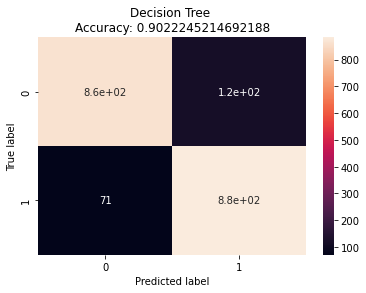

In [58]:
# Creating a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)

sns.heatmap(cm_RF, annot=True)
plt.title('Decision Tree \nAccuracy: {}'.format(accuracy_score(y_test, y_pred_RF)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The confusion matrix shows 861+883 = **1724 correct predictions** and 71+118 = **189 incorrect ones**.


In [59]:
TN=cm_RF[0,0]
TP=cm_RF[1,1]
FN=cm_RF[1,0]
FP=cm_RF[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Positives on RF: ", TP)
print("True Negatives on RF: ", TN)
print("False Positives on RF: ", FP)
print("False Negatives on RF: ", FN)
print("Sensitivity rate on RF: ",sensitivity)
print("Specifivity rate on RF: ",specificity)

True Positives:  883
True Negatives:  861
False Positives:  118
False Negatives:  71
Sensitivity:  0.9255765199161425
Specifivity:  0.8794688457609806


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       979
           1       0.97      1.00      0.98       954

    accuracy                           0.98      1933
   macro avg       0.98      0.98      0.98      1933
weighted avg       0.98      0.98      0.98      1933



[[945  34]
 [  0 954]]


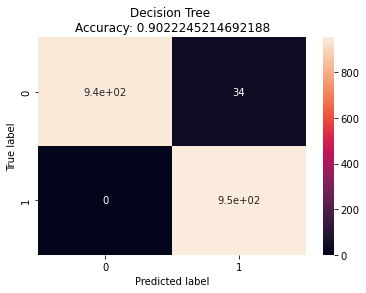

In [62]:
# Creating a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_XGB = confusion_matrix(y_test, y_pred_XGB)
print(cm_XGB)

sns.heatmap(cm_XGB, annot=True)
plt.title('Decision Tree \nAccuracy: {}'.format(accuracy_score(y_test, y_pred_RF)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [64]:
TN=cm_XGB[0,0]
TP=cm_XGB[1,1]
FN=cm_XGB[1,0]
FP=cm_XGB[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Positives on XGB: ", TP)
print("True Negatives on XGB: ", TN)
print("False Positives on XGB: ", FP)
print("False Negatives on XGB: ", FN)
print("Sensitivity rate on XGB: ",sensitivity)
print("Specifivity rate on XGB: ",specificity)

True Positives on XGB:  954
True Negatives on XGB:  945
False Positives on XGB:  34
False Negatives on XGB:  0
Sensitivity rate on XGB:  1.0
Specifivity rate on XGB:  0.965270684371808


**Result:** When Comparing False positive and False negative rates on Random Forest and XGBoost Classifier model, misclassified rate is more less in XGBoost model. Thus, XGBoost Classifier Model is best.

## ROC - AUC Curve

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (# true positives/ total # positives) versus the false positive rate (# false positives / total # negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

Predicted probabilities of 0 (default: No) and 1 (default: Yes) for the test data with a default classification threshold of 0.5

**Area Under The Curve (AUC)**

The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1 the better.

In [66]:
RF_model.predict(X_test)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [67]:
RF_model.predict_proba(X_test)[:,1]

array([0.02317466, 0.16754535, 0.02231707, ..., 0.9536384 , 0.93119229,
       0.9257035 ])

In [71]:
# from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test,RF_model.predict(X_test))
roc_auc

0.9025226828385616

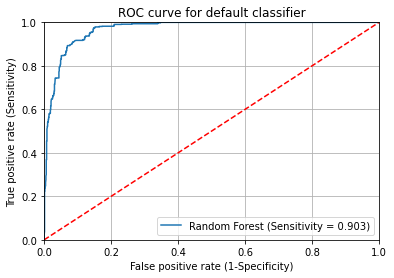

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = 'Random Forest (Sensitivity = %0.3f)' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for default classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid(True)

In [73]:
XGB_model.predict(X_test)

array([0, 0, 0, ..., 1, 1, 1])

In [74]:
XGB_model.predict_proba(X_test)[:,1]

array([3.2332272e-04, 6.5472219e-03, 7.4775249e-04, ..., 9.9180943e-01,
       9.9567008e-01, 9.8386049e-01], dtype=float32)

In [75]:
# from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,XGB_model.predict(X_test))
roc_auc

0.982635342185904

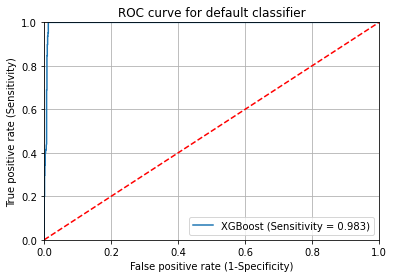

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, XGB_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = 'XGBoost (Sensitivity = %0.3f)' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for default classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid(True)

**Result:** ROC curve quantifies the greater disparity between true positive and false positive rates. 
        
        Area Under Curve (AUC) in XGBoost is 0.983.
        Area Under Curve (AUC) in Random Forest is 0.903.
        
So, AUC under XGBoost classifier is more closer to 1 comparatively to Random Forest, thus XGBoost Model is a good classifier model.